Importing libraries

In [81]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
import numpy as np

Data preprocessing

Training Image Preprocessing

In [10]:
training_set=tf.keras.utils.image_dataset_from_directory(
    "train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


Validation Image Preprocessing

In [11]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    "valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [6]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [34]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[171.75 164.75 171.75]
   [173.5  166.5  173.5 ]
   [171.25 164.25 171.25]
   ...
   [183.25 180.25 191.25]
   [185.25 182.25 193.25]
   [178.   175.   186.  ]]

  [[172.5  165.5  172.5 ]
   [172.5  165.5  172.5 ]
   [168.75 161.75 168.75]
   ...
   [180.25 177.25 188.25]
   [177.5  174.5  185.5 ]
   [179.25 176.25 187.25]]

  [[172.5  165.5  172.5 ]
   [172.5  165.5  172.5 ]
   [168.75 161.75 168.75]
   ...
   [177.75 174.75 185.75]
   [173.   170.   181.  ]
   [175.   172.   183.  ]]

  ...

  [[112.5   99.5  108.5 ]
   [104.25  91.25 100.25]
   [114.5  101.5  110.5 ]
   ...
   [121.25 111.25 122.25]
   [116.25 106.25 117.25]
   [115.25 105.25 116.25]]

  [[102.75  89.75  98.75]
   [103.5   90.5   99.5 ]
   [116.   103.   112.  ]
   ...
   [126.5  116.5  127.5 ]
   [120.   110.   121.  ]
   [116.   106.   117.  ]]

  [[114.25 101.25 110.25]
   [111.75  98.75 107.75]
   [118.25 105.25 114.25]
   ...
   [118.75 108.75 119.75]
   [120.25 110.25 121.25]
   [116.   106.   11

To avoid Overshooting 
1) Choose small learning rate , default=0.001 , but take 0.0001
2) There may be underfitting so to avoid it increase the number of neurons
3) Add more convolutional layer to extract more features

Building Model

In [49]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [50]:
model=Sequential()

Building Convolutional Layer

In [51]:
model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu",input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

c:\Users\Ammar Mandsourwala\anaconda3\envs\pr\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
model.add(Conv2D(filters=64,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [53]:
model.add(Conv2D(filters=128,kernel_size=3,padding="same",activation="relu"))
model.add(Conv2D(filters=128,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [54]:
model.add(Conv2D(filters=256,kernel_size=3,padding="same",activation="relu"))
model.add(Conv2D(filters=256,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [55]:
model.add(Conv2D(filters=512,kernel_size=3,padding="same",activation="relu"))
model.add(Conv2D(filters=512,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [56]:
model.add(Dropout(0.25))

In [57]:
model.add(Flatten())

In [58]:
model.add(Dense(units=1500,activation="relu"))

In [59]:
model.add(Dropout(0.4))

In [60]:
# output layer
model.add(Dense(units=38,activation="softmax"))

Compiling the Model

In [61]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])

In [62]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

Training the Model

In [63]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1198s 544ms/step - accuracy: 0.4018 - loss: 2.1240 - val_accuracy: 0.8545 - val_loss: 0.4672
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2386s 1s/step - accuracy: 0.8354 - loss: 0.5192 - val_accuracy: 0.8973 - val_loss: 0.3194
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1090s 496ms/step - accuracy: 0.9069 - loss: 0.2896 - val_accuracy: 0.9080 - val_loss: 0.2868
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1094s 498ms/step - accuracy: 0.9358 - loss: 0.1967 - val_accuracy: 0.9468 - val_loss: 0.1711
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1411s 642ms/step - accuracy: 0.9537 - loss: 0.1417 - val_accuracy: 0.9454 - val_loss: 0.1789
Epoch 6/10
   1/2197 ━━━━━━━━━━━━━━━━━━━━ 24:52 679ms/step - accuracy: 0.9375 - loss: 0.2046

KeyboardInterrupt: 

Model Evaluation

In [64]:
#model evaluation on training set
train_loss,train_acc=model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 352s 160ms/step - accuracy: 0.9758 - loss: 0.0721


In [65]:
print(train_loss,train_acc)

0.06679344177246094 0.9777224659919739


In [66]:
#model evaluation on validation set
val_loss,val_acc=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 96s 174ms/step - accuracy: 0.9520 - loss: 0.1628


In [67]:
print(val_loss,val_acc)

0.15840165317058563 0.9518552422523499


Saving Model

In [68]:
model.save("trained_model.h5")

In [69]:
model.save("trained_model.keras")

Some other metrics for model evaluation

In [72]:
class_name=validation_set.class_names 
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [73]:
test_set=tf.keras.utils.image_dataset_from_directory(
    "valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [75]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 101s 184ms/step


(array([[9.84890878e-01, 3.24357708e-04, 1.74901189e-07, ...,
         2.03102224e-09, 6.52800369e-10, 4.29427294e-09],
        [9.79439080e-01, 3.45963817e-05, 9.46895113e-07, ...,
         1.56476673e-07, 1.41988492e-08, 6.04218968e-08],
        [9.99998927e-01, 5.44294267e-07, 1.26364181e-08, ...,
         1.61682983e-12, 2.13708044e-11, 1.85549992e-10],
        ...,
        [1.45750967e-09, 6.65733441e-12, 8.58835314e-09, ...,
         3.55833940e-09, 1.06196635e-10, 9.99998093e-01],
        [5.71511782e-10, 3.87241151e-12, 6.10636930e-10, ...,
         8.11385459e-10, 1.48692170e-10, 9.99999762e-01],
        [3.32817744e-14, 7.33861892e-14, 3.14022853e-12, ...,
         1.24374456e-13, 6.42669902e-12, 9.99978304e-01]], dtype=float32),
 (17572, 38))

In [76]:
predicted_categories=tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [77]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [78]:
y_true=tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

Calculating some more parameters

In [85]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [84]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.88      0.93       504
                                 Apple___Black_rot       1.00      0.92      0.96       497
                          Apple___Cedar_apple_rust       0.96      0.98      0.97       440
                                   Apple___healthy       0.86      0.98      0.92       502
                               Blueberry___healthy       0.95      0.97      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.94      0.97      0.96       421
                 Cherry_(including_sour)___healthy       0.96      0.99      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.98      0.83      0.90       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.97      0.

In [86]:
cm=confusion_matrix(y_true,predicted_categories)
cm.shape

(38, 38)

Text(0.5, 1.0, 'Plant disease prediction confusion matrix')

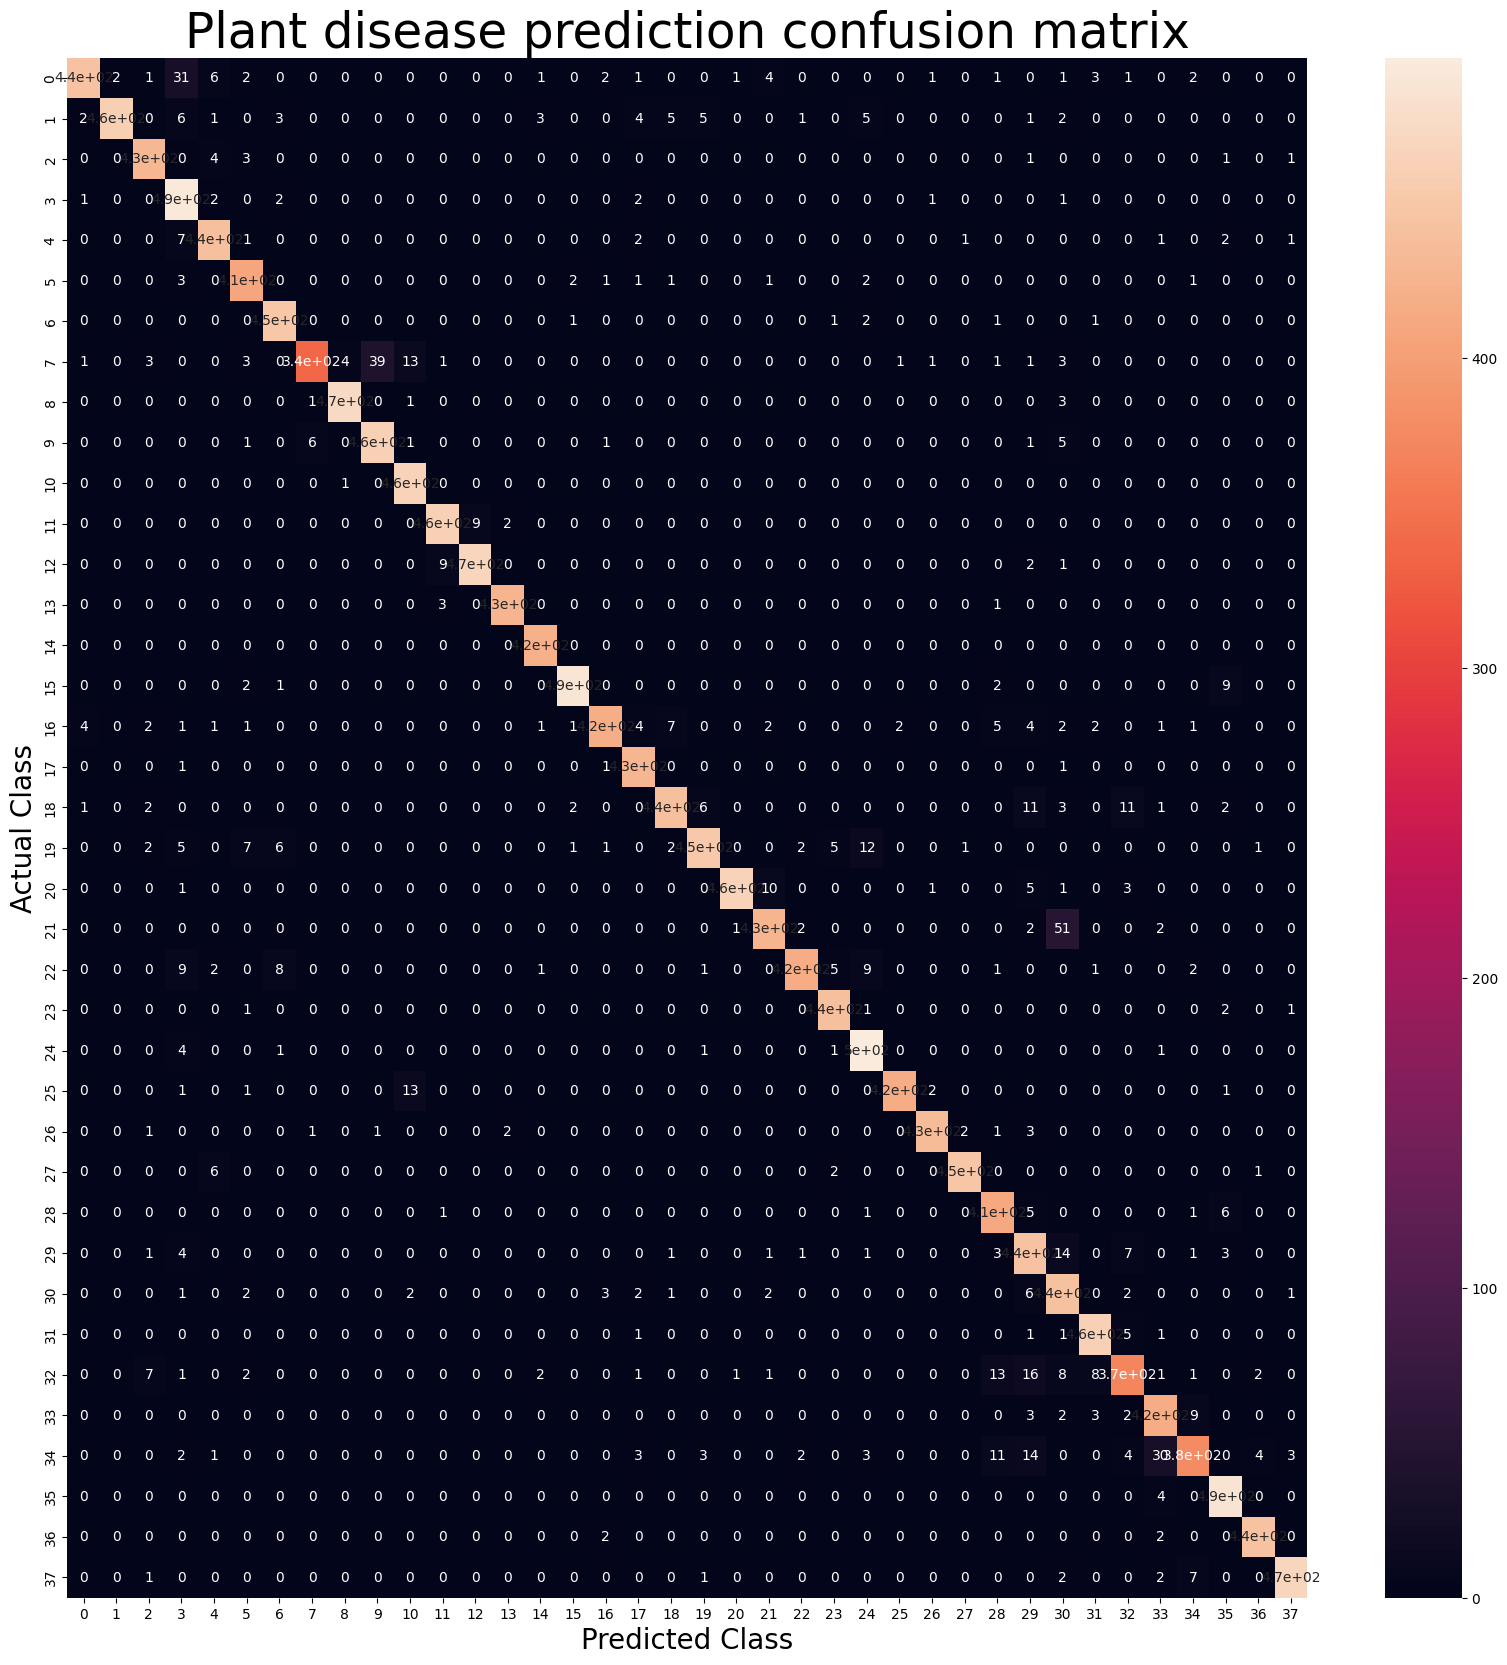

In [92]:
plt.figure(figsize=(20,20))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant disease prediction confusion matrix",fontsize=35)